In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
from matplotlib import style
%config InlineBackend.figure_format = 'retina'

style.use('seaborn-bright')
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages("Rajas Mehendale Nyquist PLots.pdf")

In [2]:
omega = np.linspace(0.01,10000,500000);
phi1 = np.arctan(-omega);
phi2 = -omega;
phi = phi1+phi2;
amp_ratio1 = 1/np.sqrt(1+omega**2);
amp_ratio2 = np.ones(np.shape(omega));
amp_ratio = amp_ratio1*amp_ratio2;
tau=1.6;taud=1;

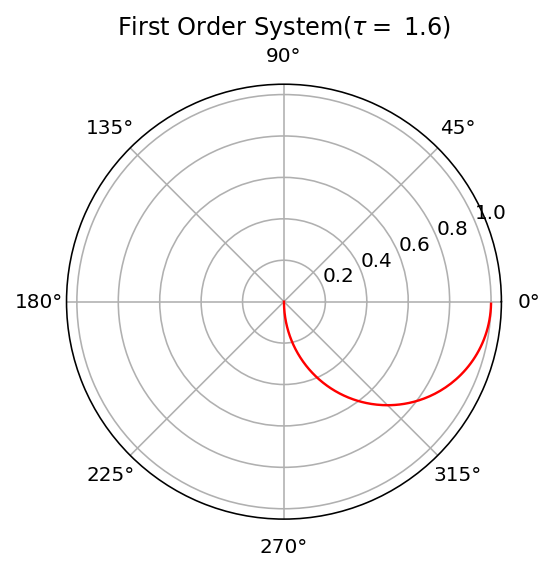

In [3]:
plt.figure(facecolor='white')
plt.axes(projection='polar')
#plt.title("Amplitude Ratio Plot "+r"$(\tau = %.2f)$, $(\tau _d = %.2f)$"%(tau,taud))
plt.polar(phi1, amp_ratio1, color='red', linewidth=1.2)
plt.title("First Order System(" + r"$\tau =$ %.1f)" %(tau));
#plt.xlabel(r'$log_{10}\ (\omega)$',fontsize=12)
#plt.ylabel(r'$log_{10}\ (\frac{AR}{K_P})$',fontsize=12)
#plt.xlim([-2,2]); plt.ylim([-2,1])
#plt.legend(loc=([0.5,0.5]),fontsize=10);
pp.savefig(bbox_inches='tight')

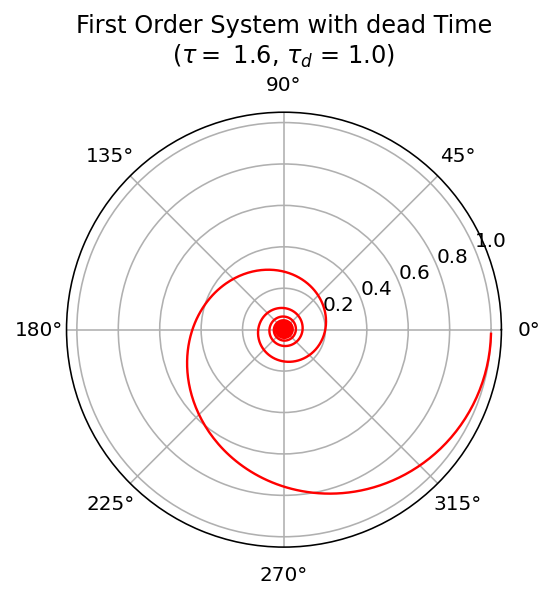

In [4]:
plt.figure(facecolor='white')
plt.axes(projection='polar')
plt.polar(phi, amp_ratio, color='red', linewidth=1.2)
plt.title("First Order System with dead Time\n(" + r"$\tau =$ %.1f, ${\tau }_{d}$ = %.1f)" %(tau,taud));
#plt.legend(loc='best',fontsize=10);
pp.savefig(bbox_inches='tight')

In [5]:
def response(w,z):
    Kp = 1.0
    a = 1- (tau**2)*(w**2)
    b = -2*tau*z*w
    sol = Kp/np.sqrt(a**2+b**2)
    return sol
zeta = [0.6,1,2]

def phicalc1(w,z):
    Kp = 1.0
    a = 1- (tau**2)*(w**2)
    b = -2*tau*z*w
    sol1 = Kp/np.sqrt(a**2+b**2)
    sol = np.arctan(b/a)
    if w > 1/tau:
        sol = sol-np.pi
    return sol
phicalc = np.vectorize(phicalc1)

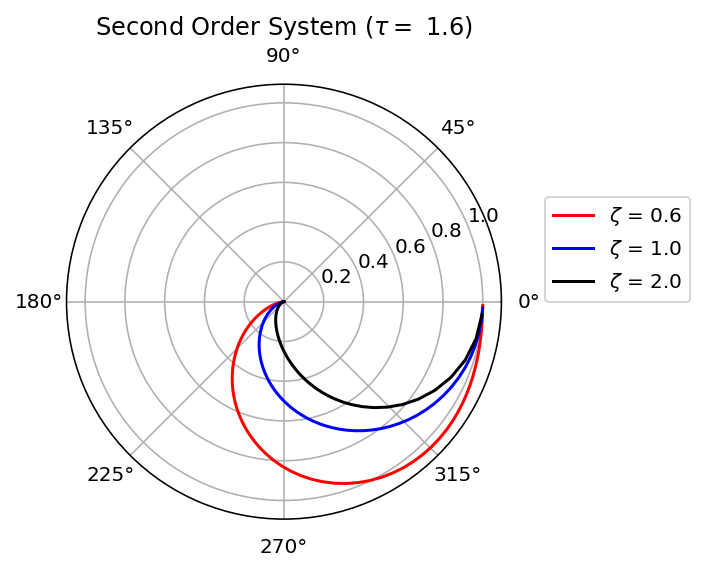

In [6]:
plt.figure(facecolor='white')
plt.axes(projection='polar')
#AR = 1 / np.sqrt(1+np.square(w))
#phi2 = -1*w + np.arctan(-1*w)
plt.polar(phicalc(omega,zeta[0]),response(omega,zeta[0]), 'r', label = r"$\zeta$ = %.1f"%(zeta[0]))
plt.polar(phicalc(omega,zeta[1]),response(omega,zeta[1]), 'b', label = r"$\zeta$ = %.1f"%(zeta[1]))
plt.polar(phicalc(omega,zeta[2]),response(omega,zeta[2]), 'k', label = r"$\zeta$ = %.1f"%(zeta[2]))
plt.title("Second Order System (" + r"$\tau =$ %.1f)" %(tau));
#plt.legend(loc='upper left',fontsize=10);
plt.legend(loc=([1.1,0.5]),fontsize=10);
pp.savefig(bbox_inches='tight')

In [7]:
def phicalc2(w,z):
    Kp = 1.0
    a = 1- (tau**2)*(w**2)
    b = -2*tau*z*w
    sol1 = Kp/np.sqrt(a**2+b**2)
    sol = np.arctan(b/a) - w
    if w > 1/tau:
        sol = sol-np.pi
    return sol
phicalcd = np.vectorize(phicalc2)

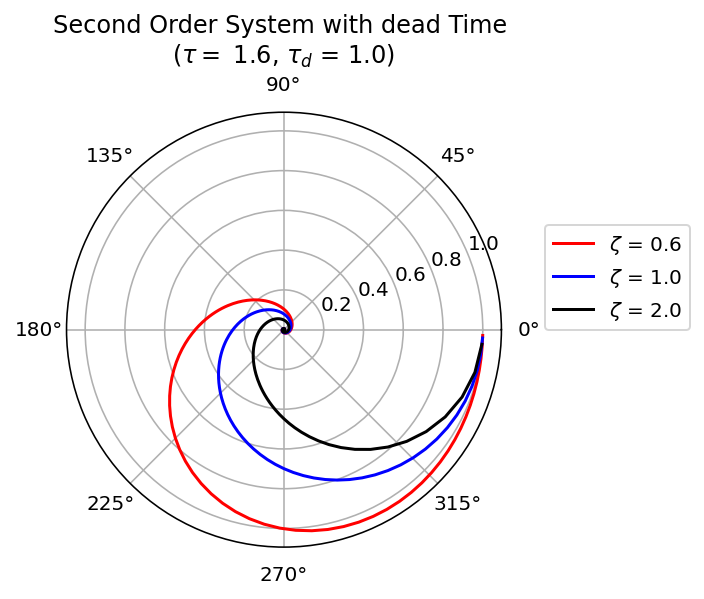

In [8]:
plt.figure(facecolor='white')
plt.axes(projection='polar')
#AR = 1 / np.sqrt(1+np.square(w))
#phi2 = -1*w + np.arctan(-1*w)
plt.polar(phicalcd(omega,zeta[0]),response(omega,zeta[0]), 'r', label = r"$\zeta$ = %.1f"%(zeta[0]))
plt.polar(phicalcd(omega,zeta[1]),response(omega,zeta[1]), 'b', label = r"$\zeta$ = %.1f"%(zeta[1]))
plt.polar(phicalcd(omega,zeta[2]),response(omega,zeta[2]), 'k', label = r"$\zeta$ = %.1f"%(zeta[2]))
plt.title("Second Order System with dead Time \n(" + r"$\tau =$ %.1f, ${\tau }_{d}$ = %.1f)" %(tau,taud));
plt.legend(loc=([1.1,0.5]),fontsize=10);
pp.savefig(bbox_inches='tight')

In [9]:
pp.close()